In [1]:
import sys
import os

from datetime import datetime

sys.path.insert(0, './src/')

from FRAPanalyzer.lifproc import LIFContainer
from FRAPanalyzer.lifproc import start_bioformats
from FRAPanalyzer.lifproc import stop_bioformats
from pprint import pprint

from collections import OrderedDict
import numpy as np

from IPython.display import HTML
from tqdm import tqdm_notebook

import matplotlib.pyplot as plt
from matplotlib import animation
from matplotlib import patches
from ipywidgets import widgets


from preprocessing import Preprocessing, Processing

In [2]:
%matplotlib notebook

In [3]:
start_bioformats()

BioContainer started


In [63]:
def plot_image(imgs, save=False):
    def init():
        ax.set_data(imgs[:,:,0])
        return ax,

    def animate(i):
        ax.set_data(imgs[:,:,i])
        return ax,
    
    fig = plt.figure()
    ax = plt.imshow(imgs[:,:,0])
    
    anim = animation.FuncAnimation(fig, animate, init_func=init,
                                   frames=imgs.shape[-1])#, interval=20, blit=True)
    
    if not save:
        return anim
    else:
        anim.save(
            os.path.join(
                'static','{}.avi'.format(
                    datetime.now().strftime('%Y%m%d%H%M%S')
                )
            ),
            fps=1,
            extra_args=['-vcodec', 'libx264']
        )

        return HTML(anim.to_html5_video())
    

In [18]:
preproc = Preprocessing(verbose=True)
lsms = preproc.get_lsms()
preproc.prepare_img(lsms[2])
preproc.prepare_rois()

  0%|          | 0/156 [00:00<?, ?it/s]

['./test_data/06.04.2014 3T3 HP-Btk FRAP.lsm', './test_data/06.04.2014 3T3 HP-Btk FRAP1.lsm', './test_data/06.04.2014 3T3 HP-Btk FRAP2.lsm']
./test_data/06.04.2014 3T3 HP-Btk FRAP2.lsm


100%|██████████| 156/156 [00:07<00:00, 21.21it/s]

OrderedDict([('06.04.2014 3T3 HP-Btk FRAP2', {'C': 1, 'T': 156, 'Y': 512, 'X': 512, 'Z': 1, 'ID': 'Image:0'})])
{'C': 1, 'T': 156, 'Y': 512, 'X': 512, 'Z': 1, 'ID': 'Image:0'}
(512, 512, 156)


<IPython.core.display.Javascript object>


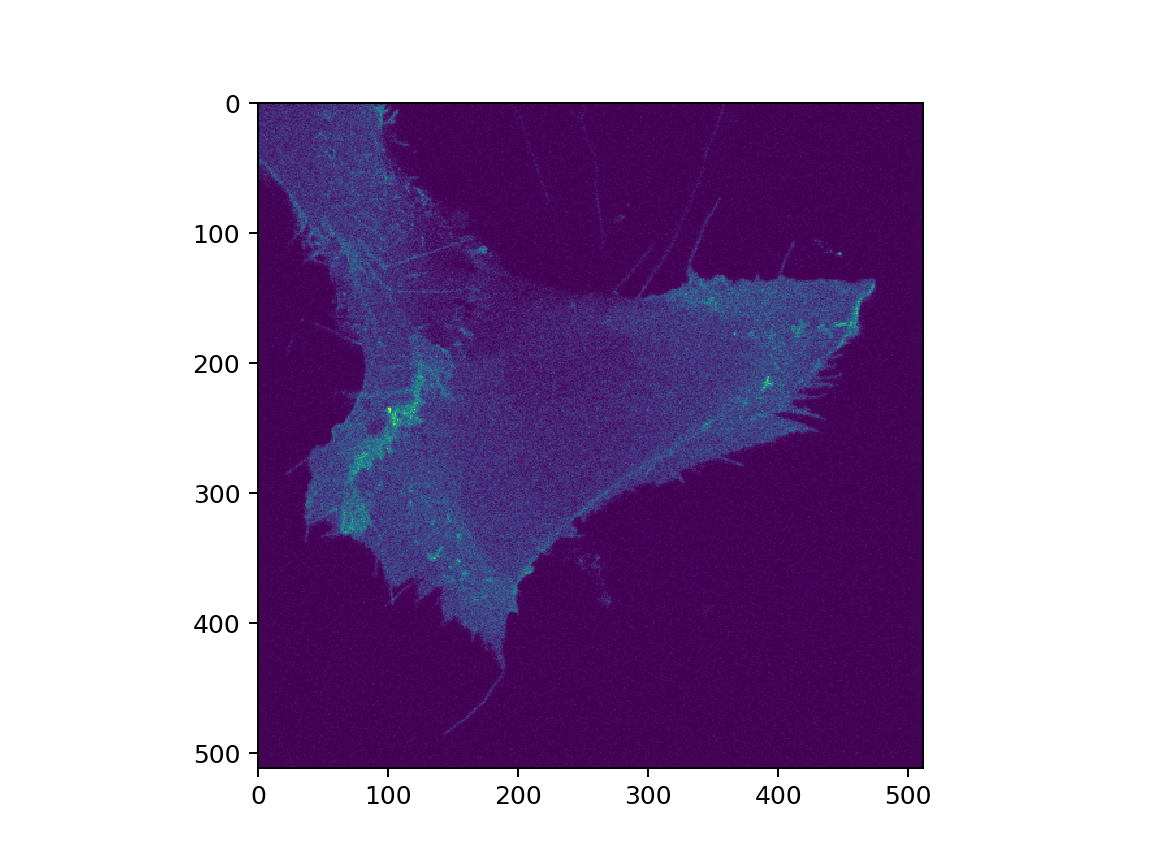

In [64]:
plot_image(preproc.img)

In [71]:
def get_show_cropped():
    fig = plt.figure(figsize=(13,5))
    
    roi_masks = [0,0,0]
    shp = img[:,:,3].shape
    sumofrois = np.zeros(shp)

    for _id, roi in enumerate(['ROI:0', 'ROI:1', 'ROI:2']):
        RadiusX, RadiusY, X, Y = map(preproc.rois_struc[roi][0].get, ('RadiusX', 'RadiusY', 'X', 'Y'))
    #     sumofrois += circle_mask(shp, (Y, X), RadiusX)
        msk = Processing.circle_mask(shp, (Y, X), RadiusX)
        ystart, ystop, xstart, xstop = roi_masks[_id] = Processing.crop_matrix(msk, padding=20)
        print ystart, ystop, xstart, xstop
        ax = plt.subplot(1, 3, _id + 1)
        ax.imshow(img[ystart:ystop, xstart:xstop, 3])
        ax.set_title(roi)
    
    #     ellipse = patches.Ellipse(xy=(X, Y), width=2*RadiusX, height=2*RadiusY, linewidth=2.0, fill=False)
    #     fig.gca().add_artist(ellipse)

    # plt.imshow(sumofrois)
    ax.set_aspect('equal')
    return roi_masks

<IPython.core.display.Javascript object>


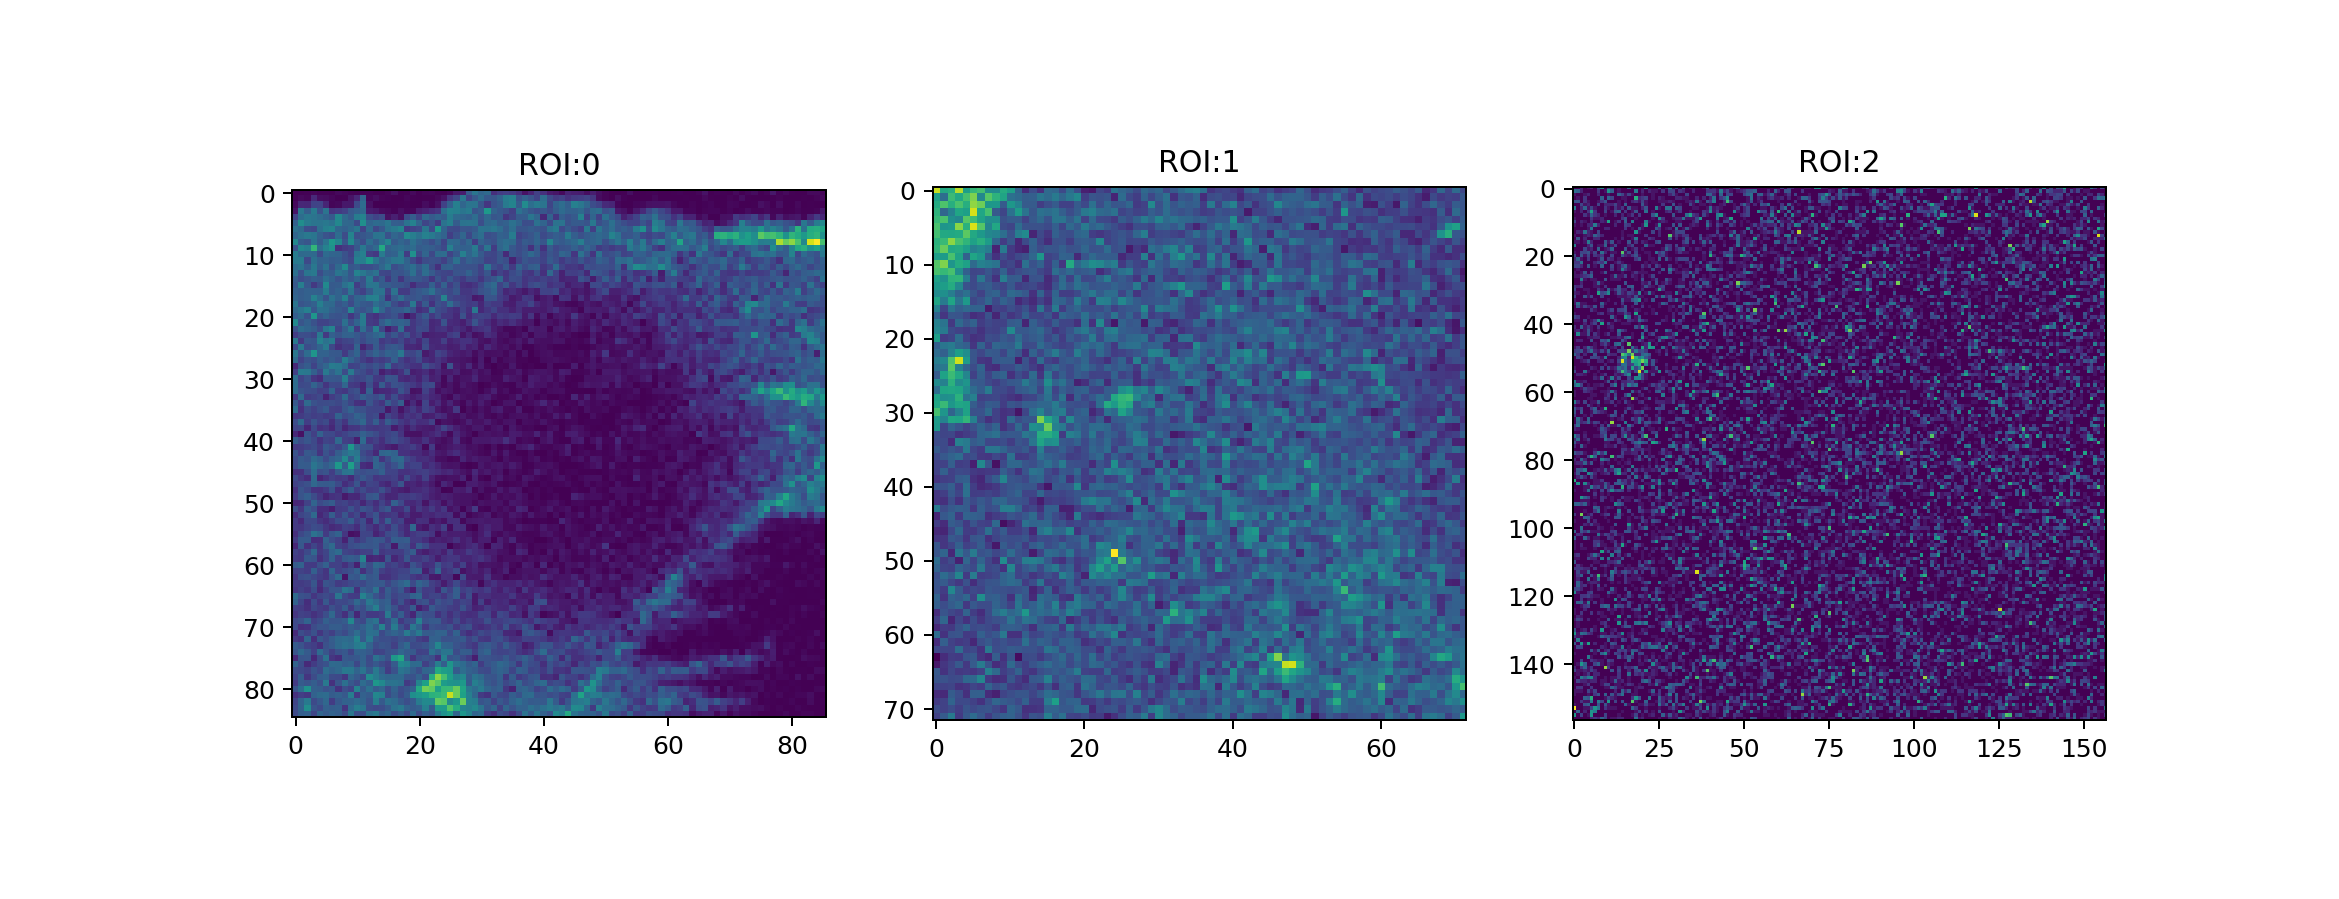

135 220 372 458
268 340 89 161
338 495 327 484


In [73]:
roi_masks = get_show_cropped()

<IPython.core.display.Javascript object>


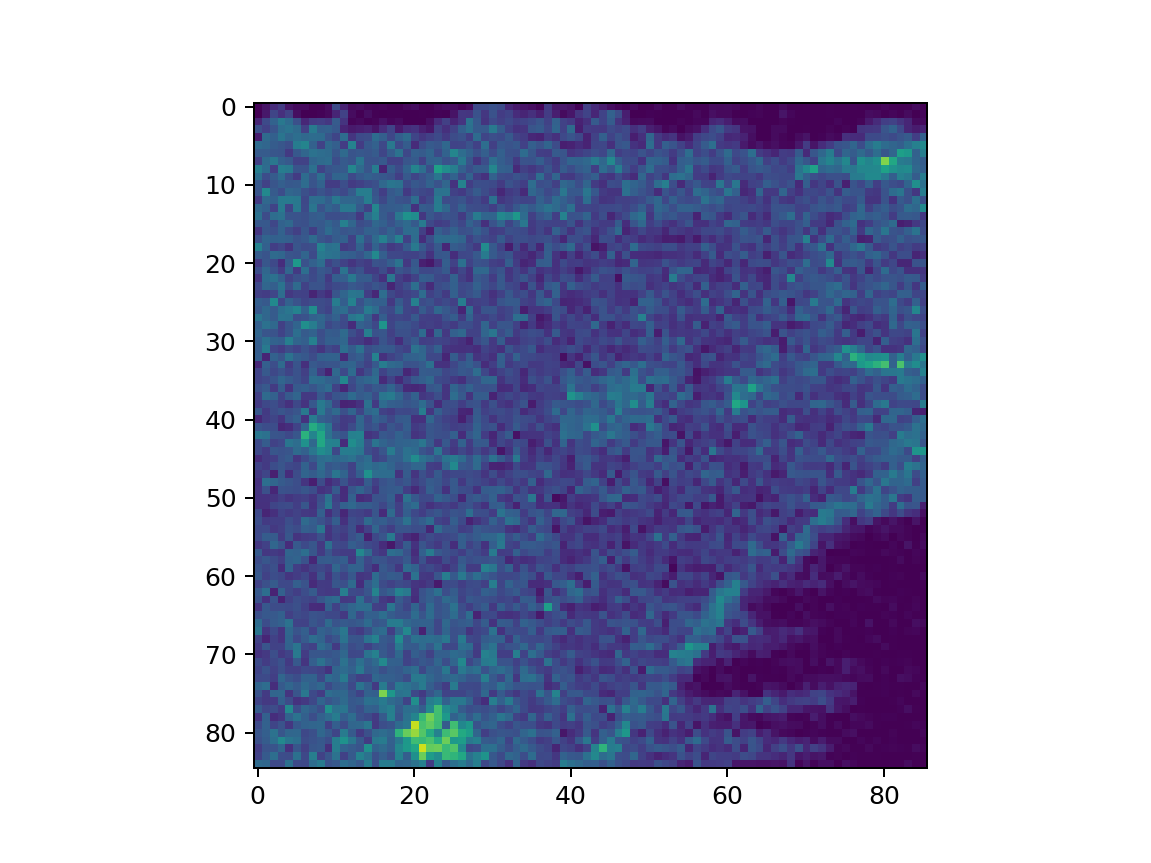

In [74]:
yst, ystp, xst, xstp = roi_masks[0]
roi0_imgs = img[yst:ystp,xst:xstp,:]
plot_image(roi0_imgs)

In [4]:
from glob import glob
mask = './test_data/06.04.2014*.lsm'
lsms = glob(mask)
lsms

['./test_data/06.04.2014 3T3 HP-Btk FRAP.lsm',
 './test_data/06.04.2014 3T3 HP-Btk FRAP1.lsm',
 './test_data/06.04.2014 3T3 HP-Btk FRAP2.lsm']

In [5]:
# ridgen of interest - roi

In [26]:
lif = LIFContainer(lsms[2])

In [27]:
lif.lif_img_data

OrderedDict([('06.04.2014 3T3 HP-Btk FRAP2',
              {'C': 1,
               'ID': 'Image:0',
               'T': 156,
               'X': 512,
               'Y': 512,
               'Z': 1})])

In [28]:
series_id = lif.lif_img_data.keys()[0]

In [29]:
img = lif.get_full_array(series_id, progressbar=True)

100%|██████████| 156/156 [00:08<00:00, 18.60it/s]


In [30]:
img.shape

(512, 512, 1, 156)

In [31]:
print(lif.lif_img_data[series_id])
current_series_id = lif.lif_series_order.index(series_id)

{'C': 1, 'T': 156, 'Y': 512, 'X': 512, 'Z': 1, 'ID': 'Image:0'}


In [32]:
rois_struc = lif.get_rois_from_oemxml()

In [33]:
rois_struc

{'ROI:0': [{'RadiusX': 22.88329322836028,
   'RadiusY': 22.88329322836028,
   'X': 414.859538784067,
   'Y': 177.10691823899373,
   'type': 'Ellipse'}],
 'ROI:1': [{'RadiusX': 16.09181225925384,
   'RadiusY': 16.09181225925384,
   'X': 124.48202959830866,
   'Y': 303.0866807610994,
   'type': 'Ellipse'}],
 'ROI:2': [{'RadiusX': 58.49250838128056,
   'RadiusY': 58.49250838128056,
   'X': 404.8372093023256,
   'Y': 415.66173361522203,
   'type': 'Ellipse'}],
 'ROI:3': [{'RadiusX': 3.5405015804933933e-06,
   'RadiusY': 3.5405015804933933e-06,
   'X': 2.9812691380566186e-05,
   'Y': -1.1781957602065604e-05,
   'type': 'Ellipse'}]}

In [34]:
rois_struc['ROI:0'][0]

{'RadiusX': 22.88329322836028,
 'RadiusY': 22.88329322836028,
 'X': 414.859538784067,
 'Y': 177.10691823899373,
 'type': 'Ellipse'}

In [35]:
sa = lif.get_structured_annotations()

In [37]:
{k:v for k,v in sa[series_id].items() if k.startswith('TimeInterval') or k.startswith('Event')}

#  'TimeInterval' '1.122461205037396'
#  'Event Description #1': 'Bleach start',
#  'Event Description #2': 'Bleach end',
#  'Event Time #1': '21736.273687960605',
#  'Event Time #2': '21739.89006432424',
#  'Event Type #1': '2',
#  'Event Type #2': '3',

{'Event Description #1': 'Bleach start',
 'Event Description #2': 'Bleach end',
 'Event Time #1': '21736.273687960605',
 'Event Time #2': '21739.89006432424',
 'Event Type #1': '2',
 'Event Type #2': '3',
 'TimeInterval': '1.122461205037396'}

In [38]:
1.122461205037396*1000*np.arange(30)

array([     0.        ,   1122.46120504,   2244.92241007,   3367.38361511,
         4489.84482015,   5612.30602519,   6734.76723022,   7857.22843526,
         8979.6896403 ,  10102.15084534,  11224.61205037,  12347.07325541,
        13469.53446045,  14591.99566549,  15714.45687052,  16836.91807556,
        17959.3792806 ,  19081.84048564,  20204.30169067,  21326.76289571,
        22449.22410075,  23571.68530579,  24694.14651082,  25816.60771586,
        26939.0689209 ,  28061.53012593,  29183.99133097,  30306.45253601,
        31428.91374105,  32551.37494608])

In [40]:
img = img[:,:,0,:]
img.shape

IndexError: too many indices for array

<IPython.core.display.Javascript object>


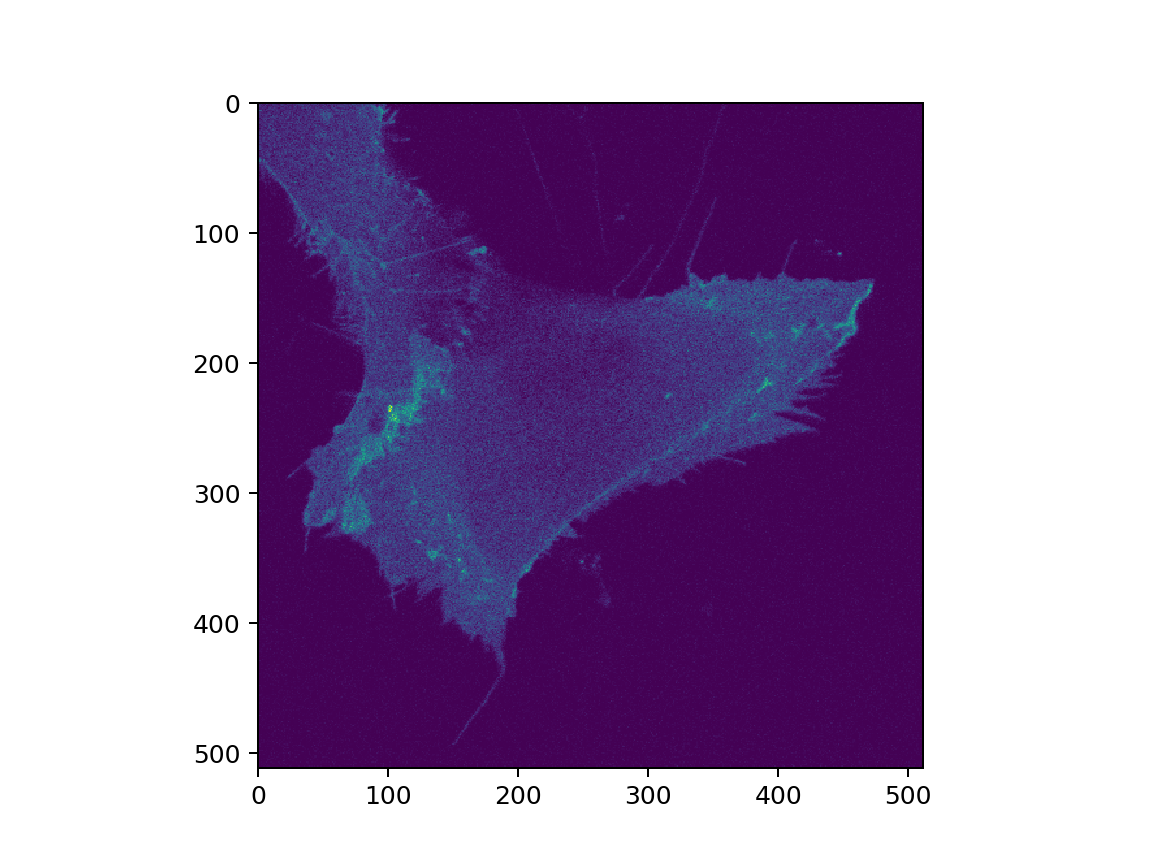

In [41]:
fig = plt.figure()
ax = plt.imshow(img[:,:,0])

def init():
    ax.set_data(np.zeros_like(img[:,:,0]))
    return ax,

def animate(i):
#     print(i)    
    ax.set_data(img[:,:,i])
#     print i
#     edge_roberts = roberts(image)
#     ax.set_data(roberts(img[:,:,channel,i]))
    return ax,

anim = animation.FuncAnimation(fig, animate, init_func=init,
                               frames=img.shape[-1])#, interval=20, blit=True)

In [21]:
rois_struc.keys()

['ROI:1', 'ROI:0', 'ROI:3', 'ROI:2']

In [22]:
def circle_mask(shape, centre, radius):
    """
    Return a circle mask
    """
    x, y = np.ogrid[:shape[0],:shape[1]]
    cx, cy = centre
    r2 = (x - cx)*(x - cx) + (y - cy)*(y - cy)
    return r2 <= radius*radius

In [23]:
def crop_matrix(A, padding=0):
    size = A.shape
    B = np.argwhere(A)
    (ystart, xstart), (ystop, xstop) = B.min(0), B.max(0) + 1
    ystart = max(0, ystart - padding)
    xstart = max(0, xstart - padding)
    ystop = min(ystop + padding, size[0])
    xstop = min(xstop + padding, size[1])
    return ystart, ystop, xstart, xstop

<IPython.core.display.Javascript object>


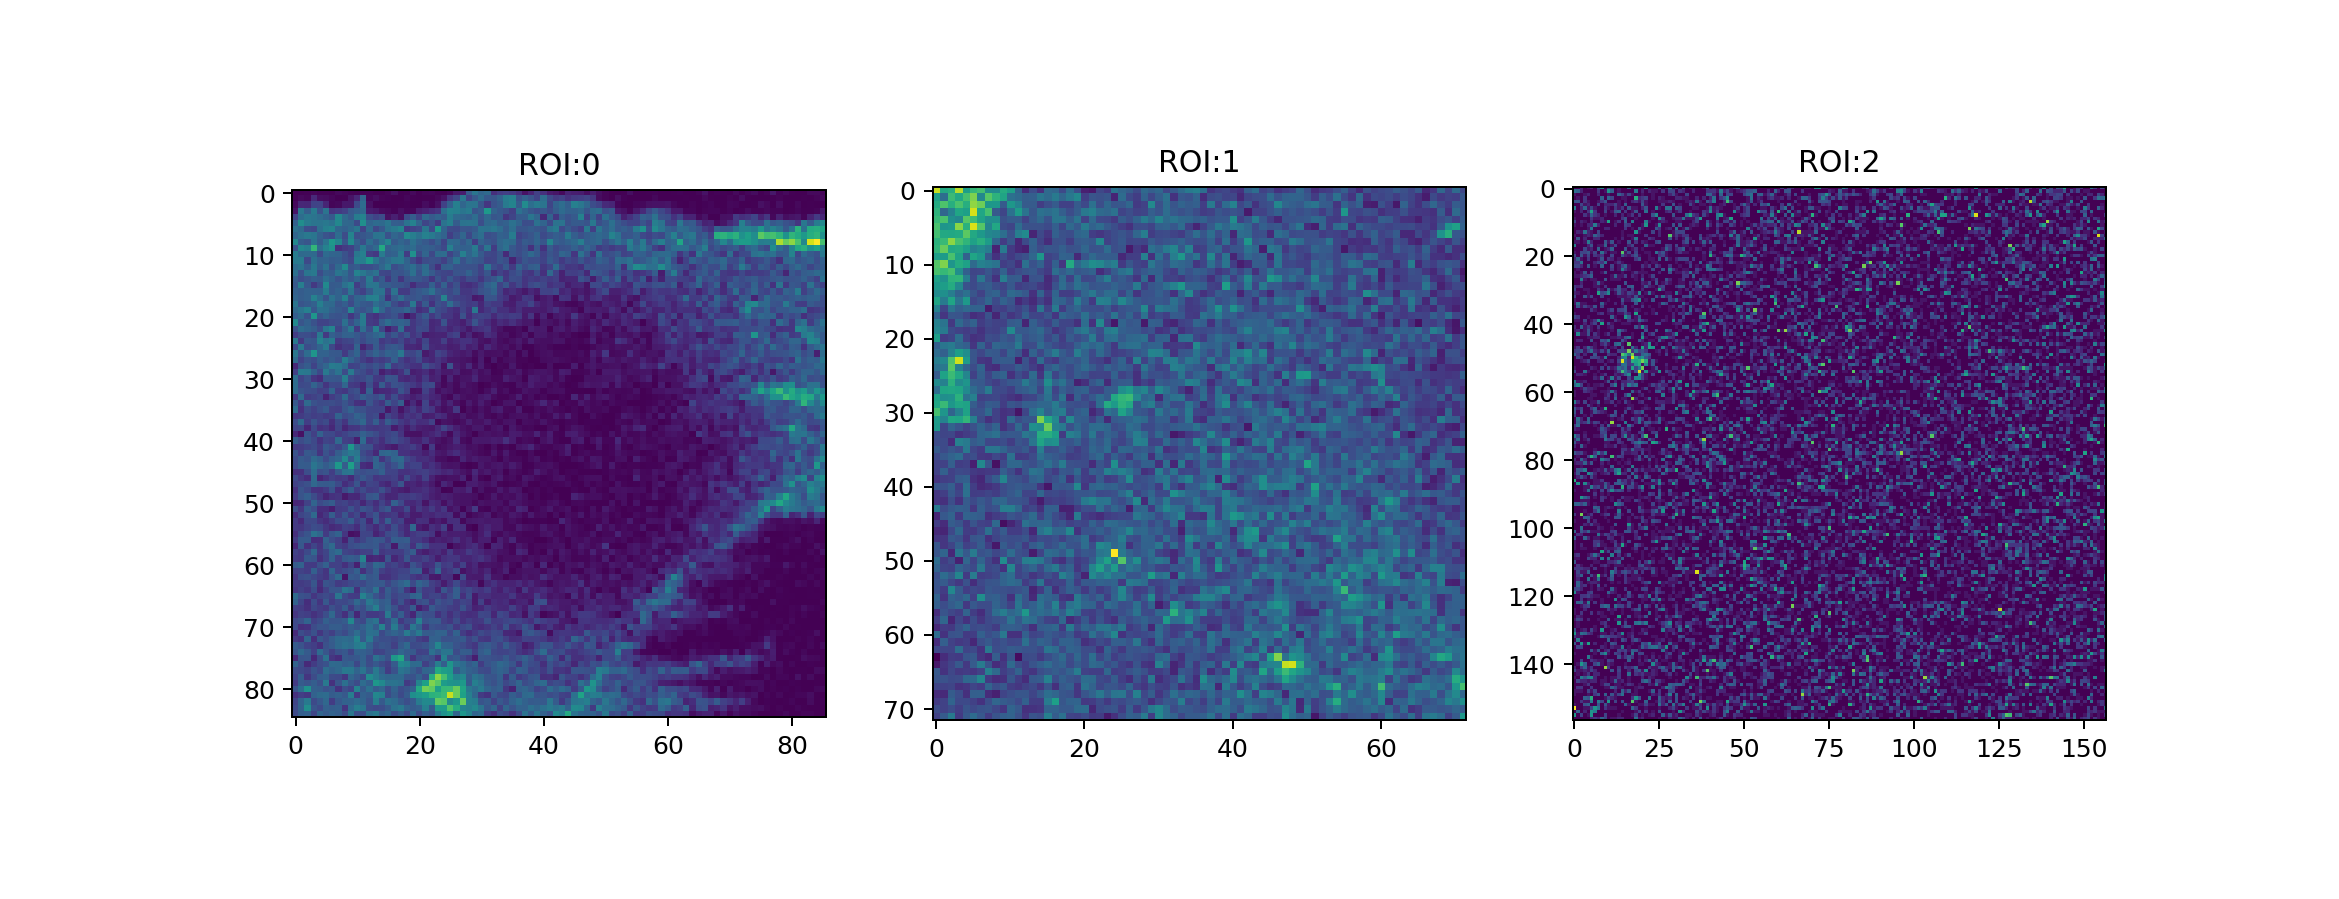

[[False False False ..., False False False]
 [False False False ..., False False False]
 [False False False ..., False False False]
 ..., 
 [False False False ..., False False False]
 [False False False ..., False False False]
 [False False False ..., False False False]]
135 220 372 458
[[False False False ..., False False False]
 [False False False ..., False False False]
 [False False False ..., False False False]
 ..., 
 [False False False ..., False False False]
 [False False False ..., False False False]
 [False False False ..., False False False]]
268 340 89 161
[[False False False ..., False False False]
 [False False False ..., False False False]
 [False False False ..., False False False]
 ..., 
 [False False False ..., False False False]
 [False False False ..., False False False]
 [False False False ..., False False False]]
338 495 327 484


In [24]:
# allocate regions from ROI structure and crop them into different pictures for further analysis
fig = plt.figure(figsize=(13,5))

roi_masks = [0,0,0]

shp = img[:,:,3].shape
sumofrois = np.zeros(shp)

for _id, roi in enumerate(['ROI:0', 'ROI:1', 'ROI:2']):
    RadiusX, RadiusY, X, Y = map(rois_struc[roi][0].get, ('RadiusX', 'RadiusY', 'X', 'Y'))
#     sumofrois += circle_mask(shp, (Y, X), RadiusX)
    msk = circle_mask(shp, (Y, X), RadiusX)
    print msk
    ystart, ystop, xstart, xstop = roi_masks[_id] = crop_matrix(msk, padding=20)
    print ystart, ystop, xstart, xstop
    ax = plt.subplot(1, 3, _id + 1)
    ax.imshow(img[ystart:ystop, xstart:xstop, 3])
    ax.set_title(roi)
#     ellipse = patches.Ellipse(xy=(X, Y), width=2*RadiusX, height=2*RadiusY, linewidth=2.0, fill=False)
#     fig.gca().add_artist(ellipse)

# plt.imshow(sumofrois)
ax.set_aspect('equal')


In [25]:
roi_masks

[(135, 220, 372, 458), (268, 340, 89, 161), (338, 495, 327, 484)]

In [26]:
yst, ystp, xst, xstp = roi_masks[0]
roi0_imgs = img[yst:ystp,xst:xstp,:]

<IPython.core.display.Javascript object>


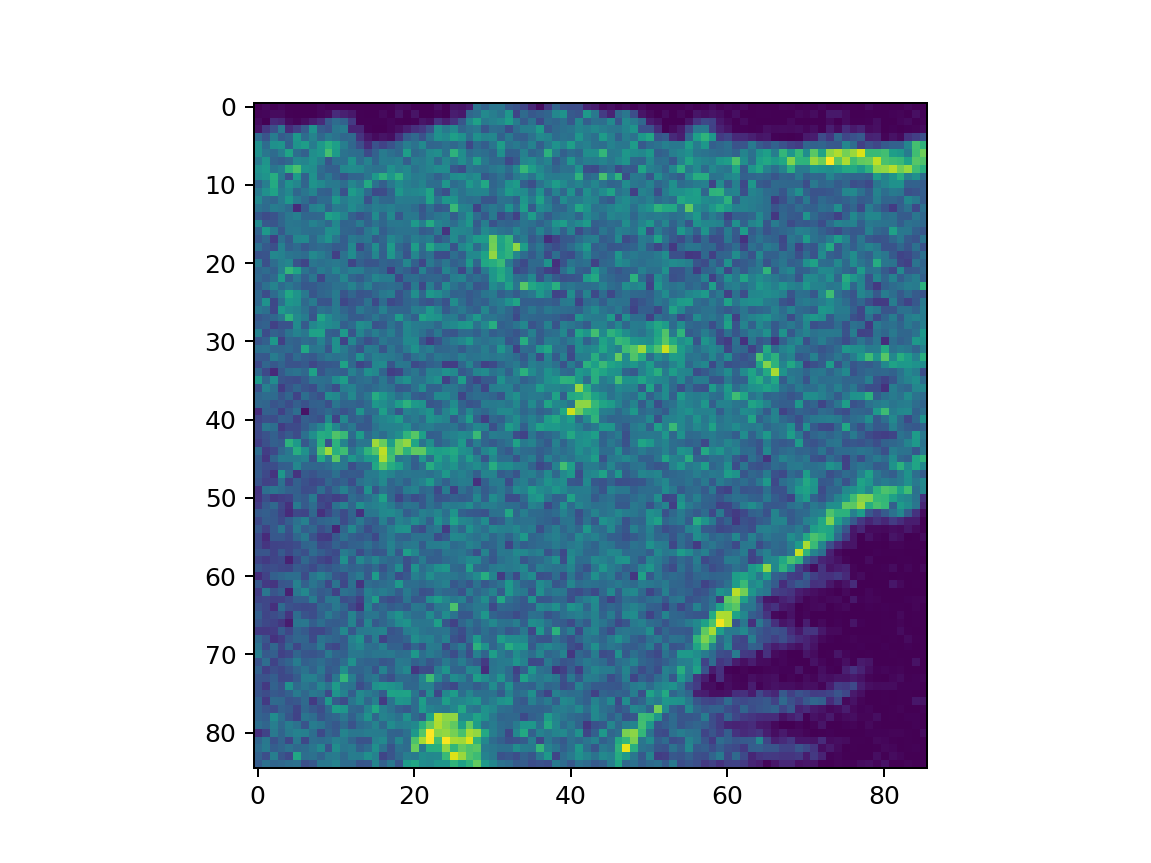

In [27]:
fig = plt.figure()
ax = plt.imshow(roi0_imgs[:,:,0])
def init():
    ax.set_data(np.zeros_like(roi0_imgs[:,:,0]))
    return ax,
def animate(i):
    ax.set_data(roi0_imgs[:,:,i])
    return ax,
anim = animation.FuncAnimation(fig, animate, init_func=init,
                               frames=roi0_imgs.shape[-1])

In [28]:
from skimage.filters import 

In [29]:
from skimage.filters import (sobel_h, sobel_v)

# horizontal / vertical
sobel_frames = (np.zeros_like(roi0_imgs), np.zeros_like(roi0_imgs))

for i in tqdm_notebook(range(roi0_imgs.shape[-1]),total=roi0_imgs.shape[-1]):
    sobel_frames[0][:,:,i] = sobel_h(roi0_imgs[:,:,i])
    sobel_frames[1][:,:,i] = sobel_v(roi0_imgs[:,:,i])

Widget Javascript not detected.  It may not be installed or enabled properly.


In [30]:
sobel_frames[0].shape, sobel_frames[1].shape

((85, 86, 156), (85, 86, 156))

In [31]:
def win_average(arr, n=3):
    """
    :param n: size of the window
    :param arr: result of filter (in particular case - sobel filter)
    """
    length = arr.shape[-1]
    
    # reduce shape because of first window
    # see [0][1][2][3] --> ([0] + [1] + [2]), ([1] + [2] +[3])
    # just two rows instead of 4 
    # 4 - (3 - 1) = 2
    result = np.zeros(arr.shape[:2] + (length - n + 1,))
    # just the average inside the window
    for i in range(length - n + 1):
        result[:, :, i] = arr[:, :, i:i + n].sum(axis=2) / n
    return result

In [32]:
# will be executed for horizontal and for vertical sobel filter
average_roi_img_n3 = map(lambda ar: win_average(ar,n=5), sobel_frames)

In [33]:
shape = roi0_imgs.shape
Ymesh, Xmesh = np.meshgrid(np.arange(shape[0]), np.arange(shape[1]))

In [34]:
print Ymesh
print '_________________'
print Xmesh

[[ 0  1  2 ..., 82 83 84]
 [ 0  1  2 ..., 82 83 84]
 [ 0  1  2 ..., 82 83 84]
 ..., 
 [ 0  1  2 ..., 82 83 84]
 [ 0  1  2 ..., 82 83 84]
 [ 0  1  2 ..., 82 83 84]]
_________________
[[ 0  0  0 ...,  0  0  0]
 [ 1  1  1 ...,  1  1  1]
 [ 2  2  2 ...,  2  2  2]
 ..., 
 [83 83 83 ..., 83 83 83]
 [84 84 84 ..., 84 84 84]
 [85 85 85 ..., 85 85 85]]


In [35]:
print Xmesh.shape
Xmesh[::3, ::3].shape

(86, 85)


(29, 29)

In [36]:
average_roi_img_n3

[array([[[ 0.        ,  0.        ,  0.        , ...,  0.        ,
           0.        ,  0.        ],
         [ 0.        ,  0.        ,  0.        , ...,  0.        ,
           0.        ,  0.        ],
         [ 0.        ,  0.        ,  0.        , ...,  0.        ,
           0.        ,  0.        ],
         ..., 
         [ 0.        ,  0.        ,  0.        , ...,  0.        ,
           0.        ,  0.        ],
         [ 0.        ,  0.        ,  0.        , ...,  0.        ,
           0.        ,  0.        ],
         [ 0.        ,  0.        ,  0.        , ...,  0.        ,
           0.        ,  0.        ]],
 
        [[ 0.        ,  0.        ,  0.        , ...,  0.        ,
           0.        ,  0.        ],
         [ 0.03588235,  0.04450981,  0.05568628, ...,  0.00039216,
          -0.00078431, -0.00078431],
         [ 0.06490196,  0.0854902 ,  0.11901961, ...,  0.00176471,
           0.00117647,  0.00078431],
         ..., 
         [-0.00294118, -0.00294

In [37]:
plt.quiverkey?

<IPython.core.display.Javascript object>


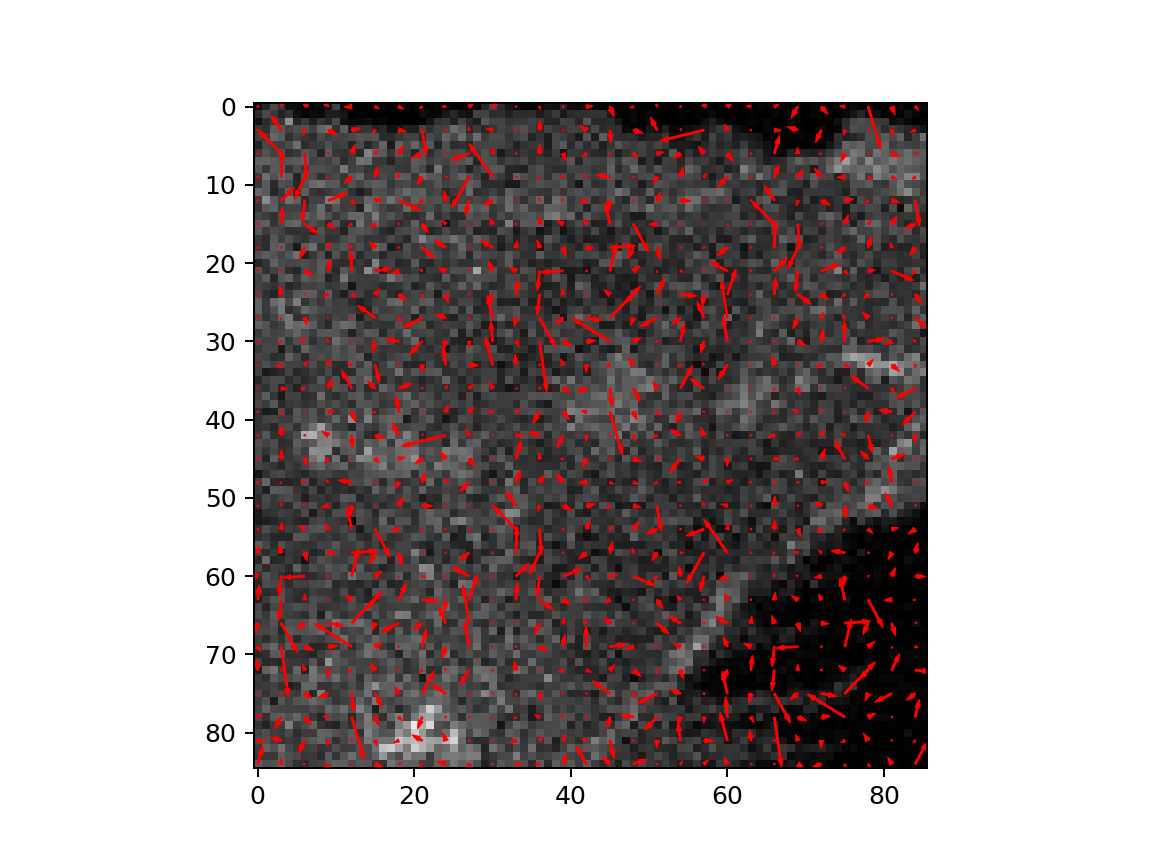

In [38]:
fig = plt.figure()
tstep = 0
# horizontal and vertical representations of sobel filter
V, U = average_roi_img_n3

Q = plt.quiver(Xmesh[::3, ::3], Ymesh[::3, ::3], U[::3, ::3, 0], V[::3, ::3, 0],
               color='r', units='x',
               linewidths=(0.5,), edgecolors=('r'), headaxislength=5)
# qk = plt.quiverkey(Q, 0.5, 0.03, 1, r'$1 \frac{m}{s}$', fontproperties={'weight': 'bold'})

ax = plt.imshow(roi0_imgs[:,:,0], cmap=plt.cm.gray)

def init():
    Q.set_UVC(U[::5, ::5, 0], V[::5, ::5, 0])
    ax.set_data(roi0_imgs[:,:,0])
    return Q,

def animate(i):
    Q.set_UVC(U[::5, ::5, i], V[::5, ::5, i])
    ax.set_data(roi0_imgs[:,:,i])
    return Q,

anim = animation.FuncAnimation(fig, animate, init_func=init, frames=60) #, interval=20, blit=True)


# Q = plt.quiver(Xmesh[::3, ::3], Ymesh[::3, ::3], U[::3, ::3, tstep], V[::3, ::3, tstep],
#                color='r', units='x',
#                linewidths=(0.5,), edgecolors=('k'), headaxislength=5)
# qk = plt.quiverkey(Q, 0.5, 0.03, 1, r'$1 \frac{m}{s}$', fontproperties={'weight': 'bold'})

<IPython.core.display.Javascript object>


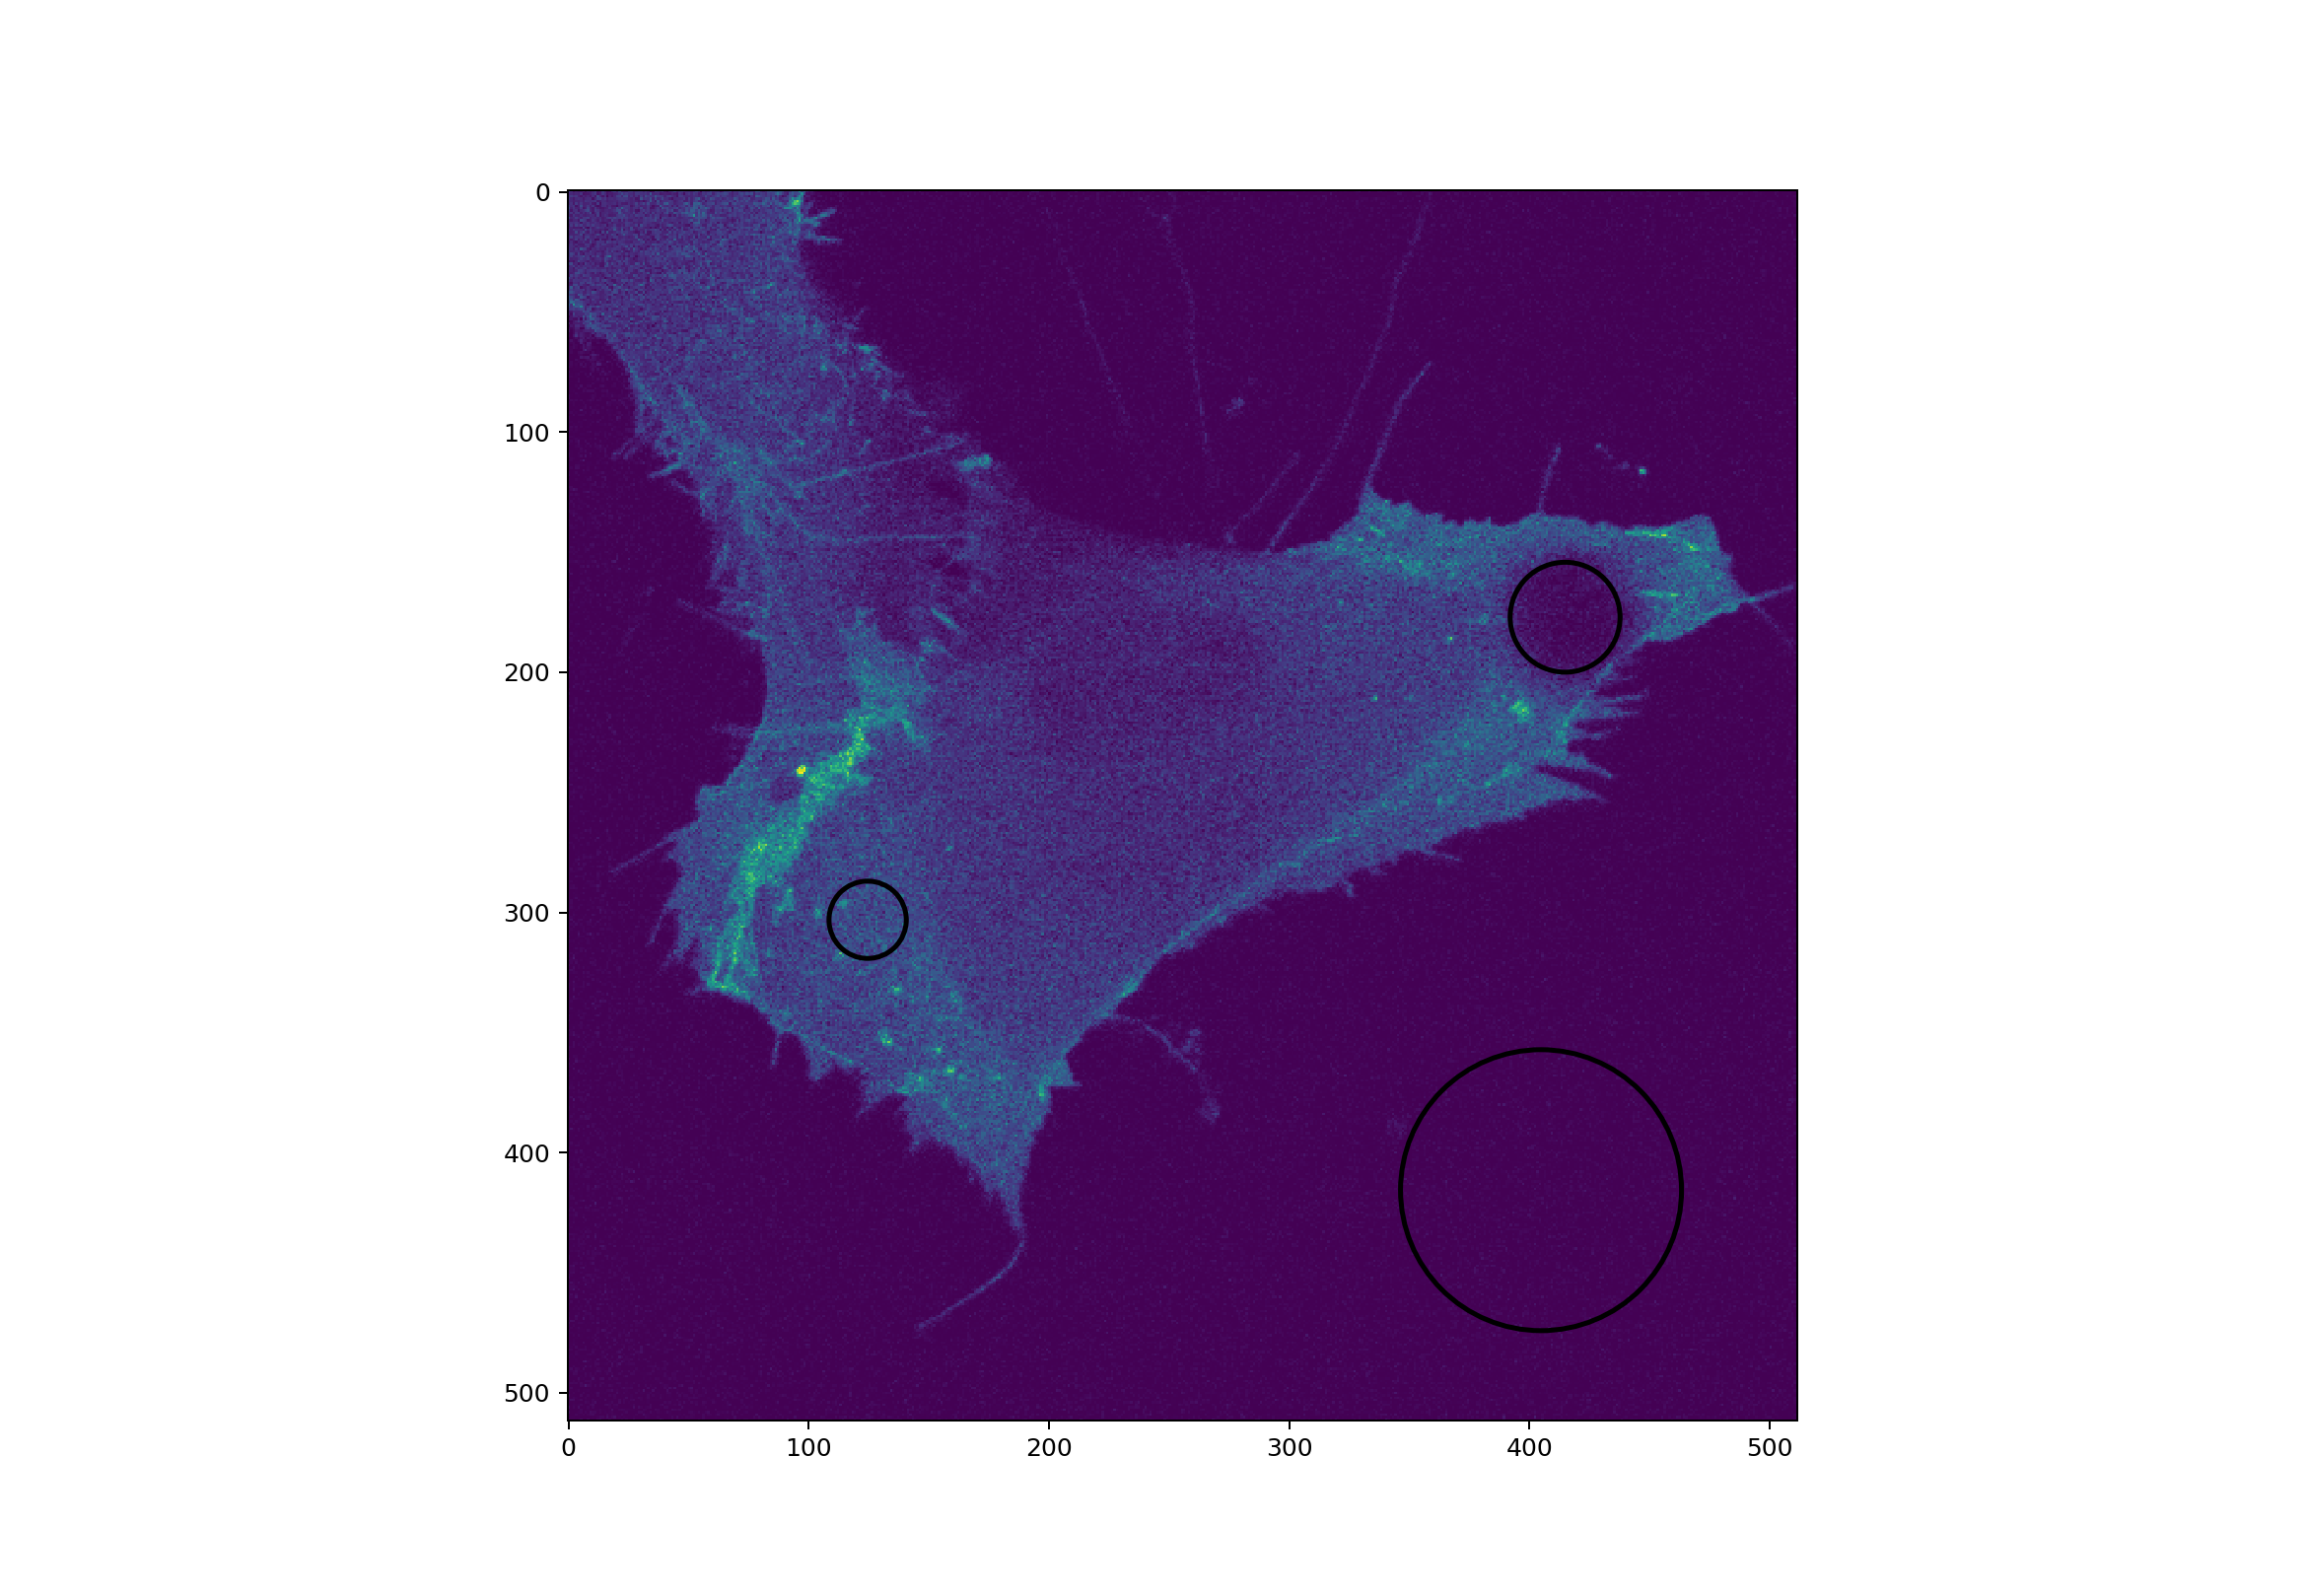

In [39]:
fig = plt.figure(figsize=(13,9))

image_ax = plt.imshow(img[:,:,3])

for roi in ['ROI:1', 'ROI:0', 'ROI:2']:
    RadiusX, RadiusY, X, Y = map(rois_struc[roi][0].get, ('RadiusX', 'RadiusY', 'X', 'Y'))
    ellipse = patches.Ellipse(xy=(X, Y), width=2*RadiusX, height=2*RadiusY, linewidth=2.0, fill=False)
    fig.gca().add_artist(ellipse)

# ax.set_aspect('equal')

In [40]:
anim.save('quiver_with_roi.avi', fps=1, extra_args=['-vcodec', 'libx264'])

HTML(anim.to_html5_video())

In [ ]:
# cut segment after bleaching
# find countour
# apply sobol filter for S_x and S_y
# get atan(S_y/S_x)
# calculate mean for some number of frames show arrow with amplitude in points


In [41]:
stop_bioformats()

BioContainer closed
